In [1]:
# %matplotlib notebook
%matplotlib inline
from IPython.display import display as mathPrint, HTML

import sympy as sp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import mpld3
mpld3.enable_notebook()

In [2]:
class Polynomial:
    # Constructor #
    def __init__(self, data):
        test_set = {value[1] for value in data}
        self.polynomial = []
        self.round_value = 20
        
        if len(test_set) == len(data):
            for coef, power in data:
                self.polynomial.append((coef, power))
            
            self.polynomial.sort(reverse=True, key=lambda x: x[1])
    
    # Magic Method addition #
    def __add__(self, otherPoly):
        newPoly = []
        addDict = {}
        
        for coef, power in self.polynomial:
            addDict[power] = coef
        for coef, power in otherPoly.polynomial:
            addDict[power] = addDict.get(power, 0) + coef
        
        for key in addDict.keys():
            newPoly.append((addDict[key], key))
        
        return Polynomial(newPoly)

    # Magic Method Subtraction #
    def __sub__(self, otherPoly):
        newPoly = []
        subDict = {}
        
        for coef, power in self.polynomial:
            subDict[power] = coef
        for coef, power in otherPoly.polynomial:
            subDict[power] = subDict.get(power, 0) - coef
        
        for key in subDict.keys():
            newPoly.append((subDict[key], key))
        
        return Polynomial(newPoly)

    # Magic Method Multiplication #
    def __mul__(self, otherPoly):
        newPoly = []
        
        if type(otherPoly) in [type(0), type(0.0)]:
            for coef, power in self.polynomial:
                newPoly.append((coef * otherPoly, power))
        
        else:
            multDict = {}
            
            for coef1, power1 in self.polynomial:
                for coef2, power2 in otherPoly.polynomial:
                    newPower = power1 + power2
                    newCoef = coef1 * coef2
                    
                    try:
                        multDict[newPower].append(newCoef)
                    except KeyError:
                        multDict[newPower] = [newCoef]
            
            for key in multDict:
                newPoly.append((sum(multDict[key]), key))
        
        return Polynomial(newPoly)
    
    # Magic Method Divison #
    def __truediv__(self, otherPoly):
        newPoly = []
        
        if type(otherPoly) in [type(0), type(0.0)]:
            for coef, power in self.polynomial:
                newPoly.append((coef / otherPoly, power))
        else:
            pass
        
        return Polynomial(newPoly)
    
    # Magic Method Representation #
    def __repr__(self):
        anythingPrinted = False
        result = ""
        
        for coef, power in self.polynomial:
            printable_coef = coef if float(coef) != int(coef) else int(coef)
            if coef:
                if anythingPrinted:
                    result += "- " if coef < 0 else "+ "
                else:
                    anythingPrinted = True
                    result += f"-" if coef < 0 else f""
                
                result += f"{round(abs(printable_coef), self.round_value)}" if abs(coef) != 1 else f""
                result += f"{round(abs(printable_coef), self.round_value)}" if not power and abs(coef) == 1 else f""
                result += f"x^{power} " if power > 1 else f"x " if power == 1 else f" "
        
        return result.strip()
    
    def execute(self, x):
        result = 0
        for coef, power in self.polynomial:
            temp = x**power
            temp *= coef
            result += temp
        
        return result


class Lagrange:
    def __init__(self, Y, poly, denominator):
        self.Y = Y
        self.poly = poly
        self.denominator = denominator
    
    def execute(self):
        self.poly *= self.Y
        self.poly = self.poly / self.denominator
        
        return self.poly


def lagrange_interpolation(X_list, Y_list):
    LagrangeList = []
    
    for i in range(len(X_list)):
        left_X_list = X_list[:i]
        right_X_list = X_list[i+1:]
        
        Y = Y_list[i]
        tempPoly = 1
        tempDenominator = 1
        
        for elem in left_X_list:
            tempPoly = Polynomial([(1, 1), (-elem, 0)]) * tempPoly
            tempDenominator *= (X_list[i] - elem)
        
        for elem in right_X_list:
            tempPoly = Polynomial([(1, 1), (-elem, 0)]) * tempPoly
            tempDenominator *= (X_list[i] - elem)
        
        tempLagrangeObj = Lagrange(Y, tempPoly, tempDenominator)
        LagrangeList.append(tempLagrangeObj)
    
    finalPoly = Polynomial([(0,0)])
    for obj in LagrangeList:
        finalPoly += obj.execute()
    
    return finalPoly

In [3]:
def take_input_lagrange():
        while True:
            try:
                X_list = list(map(float, input("Enter X values: ").split()))
                Y_list = list(map(float, input("Enter Y values: ").split()))
                
                if len(X_list) > 1 and len(Y_list) > 1:
                    if len(set(X_list)) != len(X_list):
                        print("\nYou Can't Use Same Element Of Domain Set For More Than One Time.\nMapping Is Not Injective.")
                        continue

                    elif len(X_list) > len(Y_list):
                        print("\nMore Y-values are needed.")
                        continue

                    elif len(X_list) < len(Y_list):
                        print("\nMore X-values are needed.")
                        continue

                    else:
                        return sorted([(x, y) for x, y in zip(X_list, Y_list)], key=lambda x:x[0])
                
                else:
                    print("\nMore than 1 value is needed.")
                    continue

            except:
                print("Enter Proper Value.")
                continue



In [4]:
def take_input_trapezoidal():
    x = sp.symbols("x")
    
    
    function = input("Enter Your Function: ")
    function = eval(function)
    
    a = float(input("Enter Lower Bound: "))
    b = float(input("Enter Upper Bound: "))
    
    n = int(input("Enter Number of Intervals: "))
    h = (b - a) / n
    
    return x, function, a, b, n, h



In [5]:
def LagrangeInterpolation():
    input_output_list = take_input_lagrange()
    X_list = [i[0] for i in input_output_list]
    Y_list = [i[1] for i in input_output_list]
    
    result_polynomial = lagrange_interpolation(X_list, Y_list)
    result_polynomial_str = result_polynomial.__repr__()
    result_polynomial_str = result_polynomial_str.replace("x", "*x").replace("^", "**")
    result_polynomial_str = " ".join([i.strip("*") for i in result_polynomial_str.split()])
    
    ln = sp.Function(f"L_{len(X_list) - 1}")    
    return X_list, Y_list, result_polynomial, result_polynomial_str, ln

    

In [6]:
def htmlTable(list_of_list, vertical=False):
    if vertical:
        temp_list = [[0 for i in range(len(list_of_list))] for j in range(len(list_of_list[0]))]
        for i in range(len(list_of_list)):
            for j in range(len(list_of_list[0])):
                temp_list[j][i] = list_of_list[i][j]
        
        list_of_list = temp_list
    
    code = '''<table>\n'''
    
    count = 0
    for LIST in list_of_list:
        code += "<tr>\n"
        for elem in LIST:
            try:
                elem = round(elem, 5)
            except:
                pass
            
#             if str(elem).strip() != '0':
#                 elem = str(elem).strip('0').rstrip('.')
            
            if not count:
                code += f'''<th><font face = "Times New Roman" size="3"><b>{elem}</b></font></th>\n'''
            else:
                code += f'''<td><font face = "Times New Roman" size="3"><b>{elem}</b></font></td>\n'''
        
        count += 1
        code += "</tr>\n"
    
    code += "</table>\n</font>"
    
    return HTML(code)

In [8]:
_ = '''x = sp.symbols("x")
xi = sp.symbols("x_i")
x0 = sp.symbols("x_0")
x1 = sp.symbols("x_1")
xim1 = sp.symbols("x_{i-1}")
xip1 = sp.symbols("x_{i+1}")
xn = sp.symbols("x_n")

f = sp.Function("f")
w = sp.Function("ω")
Di = sp.symbols("D_i")
Ln = sp.Function("L_n")
n = sp.symbols("n")
i = sp.symbols("i")

statement = w(x) * sp.Sum((f(xi) / Di), (i, 0, n))
wx = (x - x0) * (x - x1) ... (x - xim1) * (x - xi) * (x - xip1) ... (x - xn)

mathPrint(sp.Eq(Ln(x), statement, evaluate=False))'''

In [7]:
def main():
#     print("Calculate The Polynomial -> L")
#     print("Calculate The Area Of A Function -> T")
#     print("Calculate The Polynomial, Then Measure The Area: -> LT")
    
    # choice = input("Enter Your Choice: ").strip().upper()
    choice = "LT"
    
    x = sp.symbols("x")
    f = sp.Function("f")
    print("\n")
    
#     if choice == "L":
#         X_list, Y_list, resultPoly, resultPolyStr, ln = LagrangeInterpolation()
#         resultSP = eval(resultPolyStr)
        
#         mathPrint(HTML('''<font face = "Times New Roman" size="6">Lagrange Polynomial</p>'''))
#         mathPrint(sp.Eq(ln(x), resultSP, evaluate=False))
        
#         Xi = sp.symbols("X_i")
#         Yi = sp.symbols("Y_i")
#         table_list = [['i'] + [i for i in range(len(X_list))], ['<b>X<sub>i</sub></b>'] + X_list, ['<b>Y<sub>i</sub></b>'] + Y_list]
#         code = htmlTable(table_list)
#         mathPrint(code)
        
#         domain = np.linspace(X_list[0], X_list[-1], 1000)
#         function_range = np.array([resultSP.evalf(subs={x:i}) for i in domain], float)
        
        
# #         plt.fill_between(domain, function_range, where=[(i >= X_list[0]) and (i <= X_list[-1]) for i in domain], alpha=0.3)
        
#         plt.plot(domain, function_range)

#         plt.axvline(x=0, c="red", label="x=0")
#         plt.axhline(y=0, c="red", label="y=0")
        
#         for x, y in zip(X_list, Y_list):
# #             plt.plot([x, x], [0, y], c='c', alpha=1, marker='o')
#             plt.plot(x, 0, c='c', marker='o')
#             plt.plot(x, y, c='c', marker='o')
        
#         plt.plot(0, 0, c='red', marker='o')
    
    
#     elif choice == "T":
# #         x, function, a, b, n, h = take_input_trapezoidal()
#         function  = 1 / sp.sqrt(2 + (x ** 2))
#         function  = x ** 3 + 1
#         a, b = 0, 4
#         n = 4
#         h = (b - a)/n
        
#         mathPrint(HTML('''<font face = "Times New Roman" size="6">Trapezoidal Rule</p>'''))
        
#         integral_function = sp.Integral(function, (x, a, b))
#         mathPrint(sp.Eq(f(x), integral_function, evaluate=False))
        
#         X_values = [a] + [(a + i * h) for i in range(1, n)] + [b]
#         Y_values = [function.evalf(subs={x:i}) for i in X_values]
        
#         domain = np.linspace(X_values[0], X_values[-1], 1000)
#         function_range = np.array([function.evalf(subs={x:i}) for i in domain], float)
        
#         plt.fill_between(domain, function_range, where=[(i >= X_values[0]) and (i <= X_values[-1]) for i in domain], alpha=0.3)
#         for x, y in zip(X_values, Y_values):
#             plt.plot([x, x], [0, y], c='c', alpha=1)
        
#         plt.plot(domain, function_range)    
        
#         plt.axvline(x=0, c="red", label="x=0")
#         plt.axhline(y=0, c="red", label="y=0")
        
        
#         table_list = [['i'] + [i for i in range(len(X_values))], ['<b>X<sub>i</sub></b>'] + X_values, ['<b>Y<sub>i</sub></b>'] + Y_values]
#         code = htmlTable(table_list)
#         mathPrint(code)
        
#         It = sp.symbols("I_T")
#         c = sp.symbols("C")
#         itc = It ** c
#         Et = sp.symbols("E_T")
#         etc = Et ** c
        
#         result = (Y_values[0] / 2) + (Y_values[-1] / 2)
#         for i in Y_values[1 : -1]:
#             result += i
#         result *= h
        
#         print(f"Ans: {result}")
    
    
#     elif choice == "LT":
    if choice == "LT":
        
        X_list, Y_list, resultPoly, resultPolyStr, ln = LagrangeInterpolation()
        n = int(input("Enter Number of Intervals to Calculate Area under the Curve: "))
#         print(resultPoly)
        resultSP = eval(resultPolyStr)
        
        print("\n")
        mathPrint(HTML('''<font face = "Times New Roman" size="6" color="#fa5902"><b>Approximating Your Function With A Polynomial</b></font>'''))
        
        Xi = sp.symbols("X_i")
        Yi = sp.symbols("Y_i")
        table_list = [['i'] + [i for i in range(len(X_list))], ['<b>X<sub>i</sub></b>'] + X_list, ['<b>f(X<sub>i</sub>)</b>'] + Y_list]
        code = htmlTable(table_list)
        print("\n")
        mathPrint(HTML(f'''<font face = "Times New Roman" size="4"><b>(x, y)</b> Provided By You:</font>'''))
        mathPrint(code)
        
        print("\n")
        mathPrint(HTML(f'''<font face = "Times New Roman" size="4"><b>Approximated Polynomial:</font>'''))
        mathPrint(sp.Eq(ln(x), resultSP, evaluate=False))
        
        Y_testing = [resultSP.evalf(subs={x:i}) for i in X_list]
#         print(Y_testing)
        table_list = [['i'] + [i for i in range(len(X_list))], ['<b>X<sub>i</sub></b>'] + X_list, [f'<b>L<sub>{len(X_list) - 1}</sub>(X<sub>i</sub>)</b>'] + Y_testing]
        code = htmlTable(table_list)
        
        print("\n")
        mathPrint(HTML(f'''<font face = "Times New Roman" size="4"><b>Testing The Polynomial:</font>'''))
        mathPrint(code)
        
        function  = resultSP
        a, b = X_list[0], X_list[-1]
        h = (b - a)/n
        
        print("\n")
        mathPrint(HTML('''<font face = "Times New Roman" size="6" color="#ed0caa"><b>Calculating Area Under The Curve Of The Approximated Polynomial</b></font>'''))
        
        integral_function = sp.Integral(function, (x, a, b))
        mathPrint(sp.Eq(sp.Integral(ln(x), (x, a, b)), integral_function, evaluate=False))
        
        print("\n")
        mathPrint(HTML(f'''
        <font face = "Times New Roman" size="4">
        [Lower Bound]<br>a = {a}<br><br>
        [Upper Bound]<br>b = {b}<br><br>
        [Number of Intervals]<br>n = {n}<br><br>
        [Step Length]<br>h = {h}<br><br>
        X<sub>i</sub> = a + ih</font>
        '''))
        print()
        
        X_values = [a] + [(a + i * h) for i in range(1, n)] + [b]
        Y_values = [function.evalf(subs={x:i}) for i in X_values]
        
        domain = np.linspace(X_values[0], X_values[-1], 1000)
        function_range = np.array([function.evalf(subs={x:i}) for i in domain], float)
        
#         plt.fill_between(domain, function_range, where=[(i >= X_values[0]) and (i <= X_values[-1]) for i in domain], alpha=0.3)
        for x, y in zip(domain, function_range):
            if y > 0:
                plt.plot([x, x], [0, y], c='c', alpha=0.6)
            else:
                plt.plot([x, x], [0, y], c='r', alpha=0.6)
        
        for x, y in zip(X_values, Y_values):
            plt.plot([x, x], [0, y], c='y', alpha=1)
        
        plt.plot(domain, function_range)    
        
#         plt.axvline(x=0, c="red", label="x=0")
#         plt.axhline(y=0, c="red", label="y=0")
        
        for x, y in zip(X_list, Y_list):
            plt.plot(x, 0, c='g', marker='.')
            plt.plot(x, y, c='g', marker='.')
        
        for i in range(len(X_values) - 1):
                current_X = X_values[i]
                current_Y = Y_values[i]
                
                next_X = X_values[i+1]
                next_Y = Y_values[i+1]
                
                if current_Y * next_Y >= 0:
                    if abs(current_Y) < abs(next_Y):                        
                        for x in np.linspace(current_X, next_X, 50):
                            plt.plot([x, x], [0, current_Y], c='m', alpha=0.3)
                        
                        plt.plot([current_X, next_X], [current_Y, current_Y], c='y', alpha=1)
                        
                    else:                        
                        for x in np.linspace(current_X, next_X, 50):
                            plt.plot([x, x], [0, next_Y], c='m', alpha=0.3)
                        
                        plt.plot([current_X, next_X], [next_Y, next_Y], c='y', alpha=1)

                        
#             if Y1 * Y2 > 0:
#                 plt.plot([X1, X2], [Y1, Y2], c='c', alpha=1)
        
        
        table_list = [['i'] + [i for i in range(len(X_values))], ['<b>X<sub>i</sub></b>'] + X_values, [f'<b>L<sub>{len(X_list) - 1}</sub>(X<sub>i</sub>)</b>'] + Y_values]
        code = htmlTable(table_list, True)
        mathPrint(code)
        
        It = sp.symbols("I_T")
        c = sp.symbols("C")
        itc = It ** c
        Et = sp.symbols("E_T")
        etc = Et ** c
        
        result = (Y_values[0] / 2) + (Y_values[-1] / 2)
        for i in Y_values[1 : -1]:
            result += i
        result *= h
        
        print()
        mathPrint(HTML(f'''<font face = "Times New Roman" size="5">Area Under L<sub>{len(X_list) - 1}</sub>(x) at the interval [{X_list[0]}, {X_list[-1]}]: <b>{result}</b></p>'''))


        
        
        

Enter X values:  1 10 15 21
Enter Y values:  5 10 -6 5
Enter Number of Intervals to Calculate Area under the Curve:  10


i,0,1,2,3
Xi,1.0,10.0,15.0,21.0
f(Xi),5.0,10.0,-6.0,5.0


Eq(L_3(x), 0.0362914862914863*x**3 - 1.21183261183261*x**2 + 9.85735930735931*x - 3.68181818181818)

i,0,1,2,3
Xi,1.0,10.0,15.0,21.0
L3(Xi),5.00000000000000,10.0000000000000,-6.00000000000000,5.00000000000000


Eq(Integral(L_3(x), (x, 1.0, 21.0)), Integral(0.0362914862914863*x**3 - 1.21183261183261*x**2 + 9.85735930735931*x - 3.68181818181818, (x, 1.0, 21.0)))

i,Xi,L3(Xi)
0,1.0,5.00000000000000
1,3.0,15.96364
2,5.0,19.84560
3,7.0,18.38788
4,9.0,13.33247
5,11.0,6.42136
6,13.0,-0.60346
7,15.0,-6.00000000000000
8,17.0,-8.02626
9,19.0,-4.94026


'\n7 1 3 9 0 6\n76 -29 182 37 -8 -6\n'

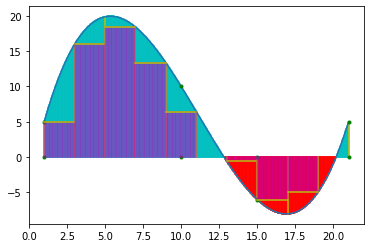

In [8]:
if __name__ == "__main__":
    main()

'''
7 1 3 9 0 6
76 -29 182 37 -8 -6
'''